✅ Libraries imported successfully!
📊 Ready for Backward Elimination Analysis
📋 Dataset Information:
Shape: (302752, 36)

🎯 Initial Feature Set (22 features):
 1. Total_No_of_Workers
 2. Total_Households_Worked
 3. Total_Individuals_Worked
 4. Average_Wage_rate_per_day_per_person
 5. Wages
 6. Persondays_of_Central_Liability_so_far
 7. SC_persondays
 8. ST_persondays
 9. Women_Persondays
10. Total_Adm_Expenditure
11. Number_of_Completed_Works
12. Number_of_Ongoing_Works
13. Total_No_of_Active_Job_Cards
14. Total_No_of_Active_Workers
15. Total_No_of_JobCards_issued
16. Material_and_skilled_Wages
17. Average_days_of_employment_provided_per_Household
18. Differently_abled_persons_worked
19. percent_of_Category_B_Works
20. percent_of_Expenditure_on_Agriculture_Allied_Works
21. percent_of_NRM_Expenditure
22. percentage_payments_gererated_within_15_days

🎯 Target Variable: Total_Exp
🔍 Data Quality Check:
Feature matrix shape: (302752, 22)
Target vector shape: (302752,)

📊 Missing Values Analy

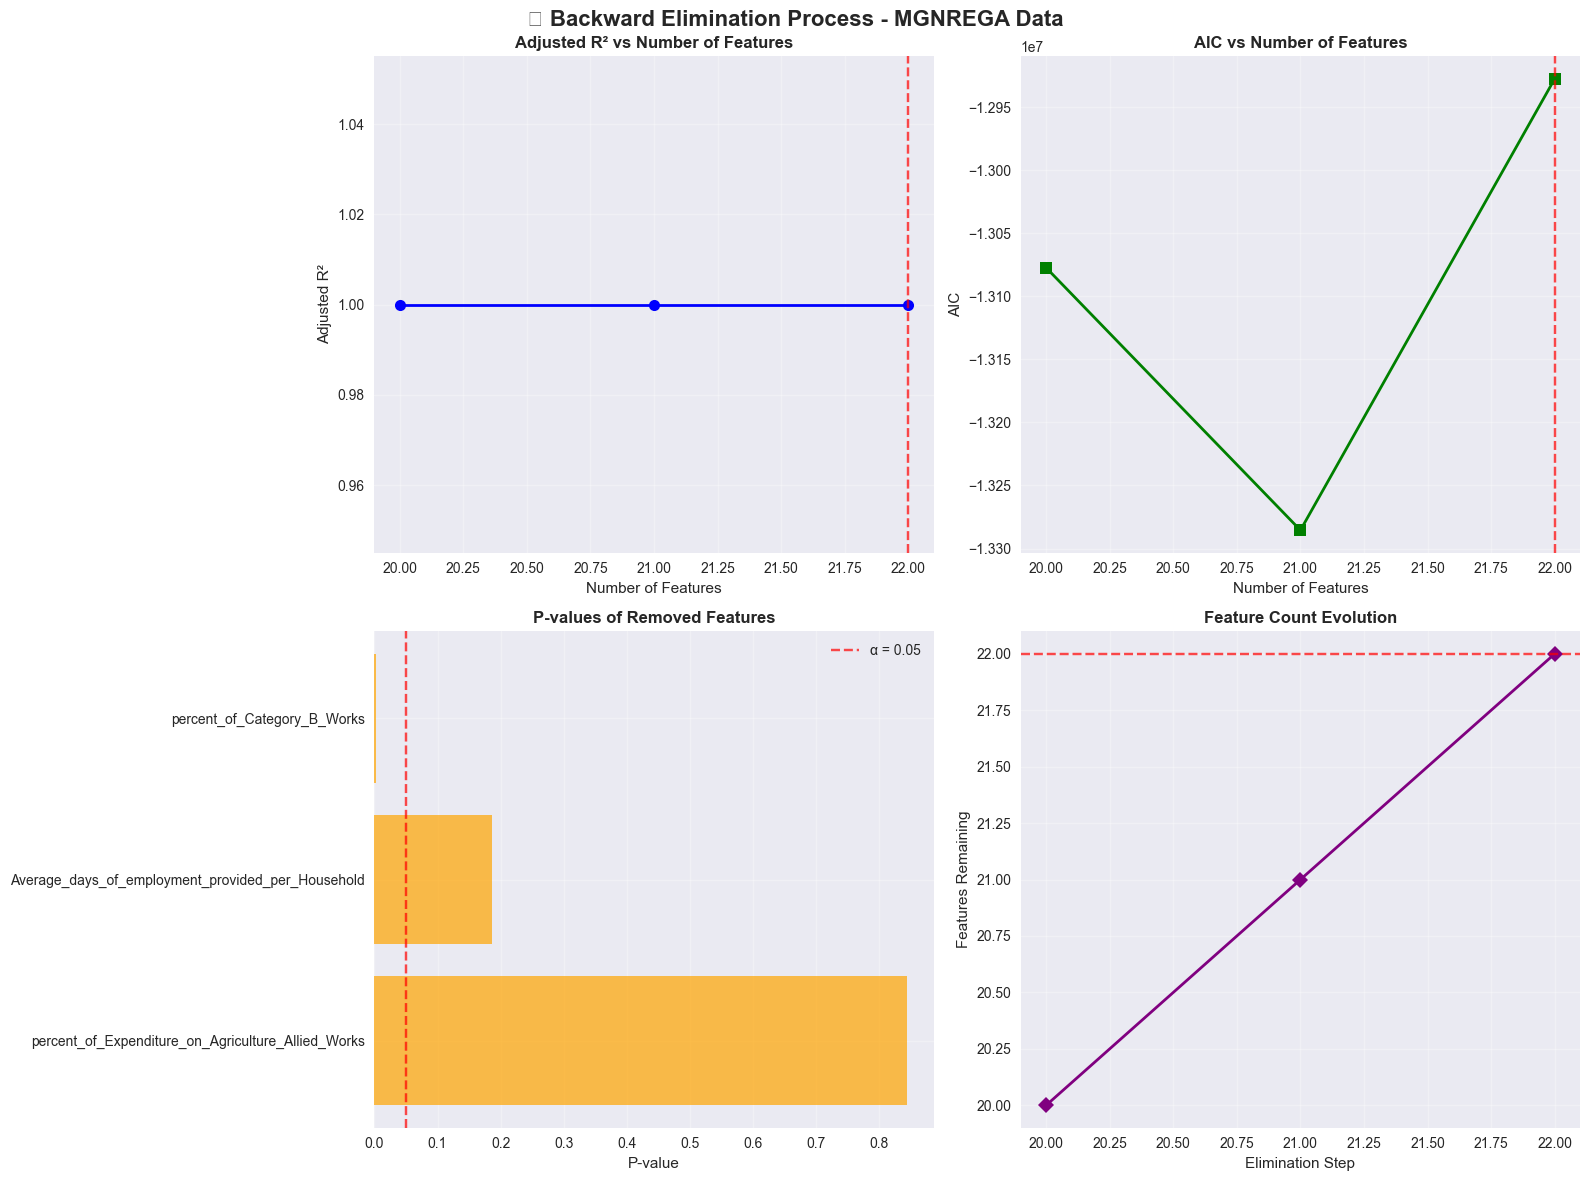

🎯 Final Model (Selected Features):
                            OLS Regression Results                            
Dep. Variable:              Total_Exp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.165e+32
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:22:32   Log-Likelihood:             6.5388e+06
No. Observations:              302752   AIC:                        -1.308e+07
Df Residuals:                  302731   BIC:                        -1.308e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

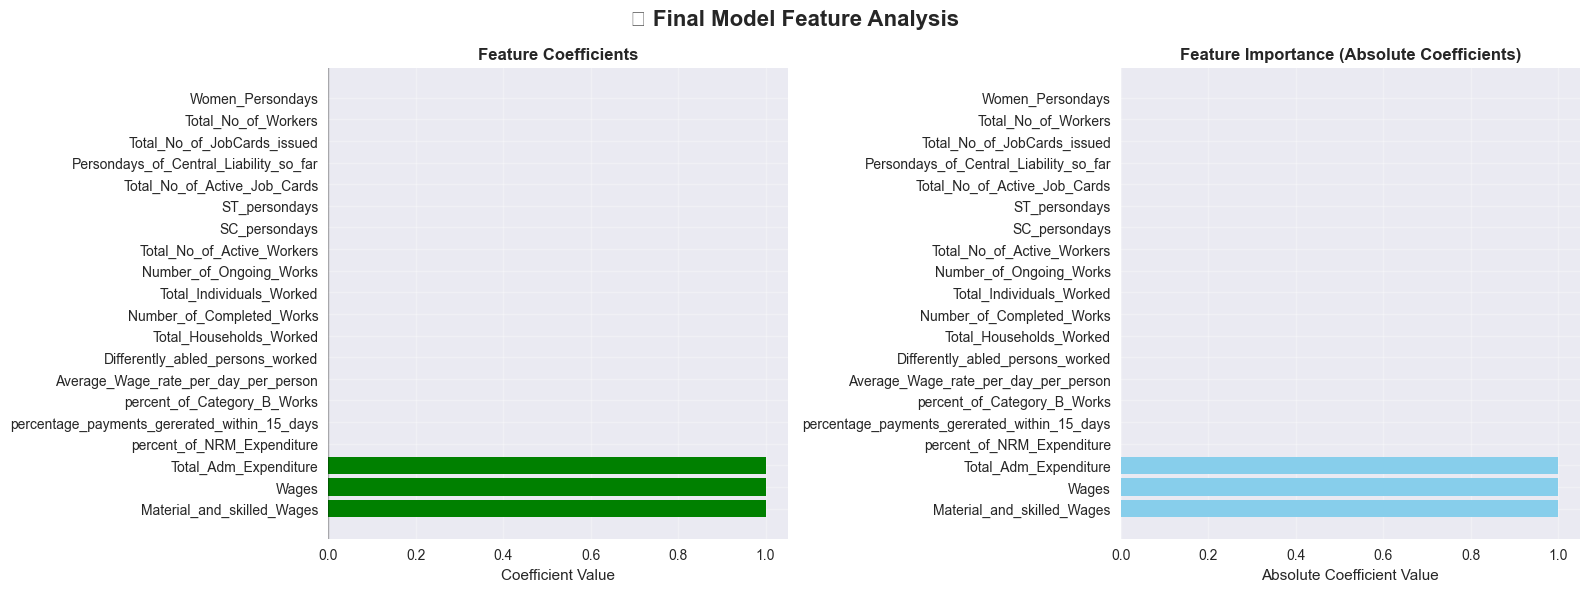


📊 Variance Inflation Factor (Final Features):
                                         Feature         VIF
13                    Total_No_of_Active_Workers  154.474016
12                  Total_No_of_Active_Job_Cards  151.215477
0                            Total_No_of_Workers  139.614019
14                   Total_No_of_JobCards_issued  135.664209
1                        Total_Households_Worked   82.226097
2                       Total_Individuals_Worked   78.108911
5         Persondays_of_Central_Liability_so_far   76.915194
4                                          Wages   37.742755
8                               Women_Persondays   32.962212
19  percentage_payments_gererated_within_15_days    8.733010
17                   percent_of_Category_B_Works    6.464431
6                                  SC_persondays    5.807630
11                       Number_of_Ongoing_Works    5.701096
15                    Material_and_skilled_Wages    3.895764
9                          Total_Adm_E

In [1]:
# =============================================================================
# BACKWARD ELIMINATION - MGNREGA DATA ANALYSIS
# =============================================================================
# Objective: Feature selection using statistical significance (p-value)
# Dataset: MGNREGA (Mahatma Gandhi National Rural Employment Guarantee Act)
# Author: ML Practical Assignment
# Date: 2025
# =============================================================================

# =============================================================================
# CELL 1: Import Required Libraries
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready for Backward Elimination Analysis")

# =============================================================================
# CELL 2: Load and Prepare Dataset
# =============================================================================

# Load the dataset
df = pd.read_csv('../Datasets/Cleaned_Preprocessed/mgnrega_data_fully_cleaned.csv')

print("📋 Dataset Information:")
print(f"Shape: {df.shape}")

# Select comprehensive set of features for backward elimination
initial_features = [
    'Total_No_of_Workers', 'Total_Households_Worked', 'Total_Individuals_Worked',
    'Average_Wage_rate_per_day_per_person', 'Wages', 'Persondays_of_Central_Liability_so_far',
    'SC_persondays', 'ST_persondays', 'Women_Persondays', 'Total_Adm_Expenditure',
    'Number_of_Completed_Works', 'Number_of_Ongoing_Works', 'Total_No_of_Active_Job_Cards',
    'Total_No_of_Active_Workers', 'Total_No_of_JobCards_issued', 'Material_and_skilled_Wages',
    'Average_days_of_employment_provided_per_Household', 'Differently_abled_persons_worked',
    'percent_of_Category_B_Works', 'percent_of_Expenditure_on_Agriculture_Allied_Works',
    'percent_of_NRM_Expenditure', 'percentage_payments_gererated_within_15_days'
]

target_column = 'Total_Exp'

print(f"\n🎯 Initial Feature Set ({len(initial_features)} features):")
for i, feature in enumerate(initial_features, 1):
    print(f"{i:2d}. {feature}")

print(f"\n🎯 Target Variable: {target_column}")

# =============================================================================
# CELL 3: Data Preprocessing
# =============================================================================

# Create feature matrix and target vector
X = df[initial_features].copy()
y = df[target_column].copy()

print("🔍 Data Quality Check:")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for missing values
missing_values = X.isnull().sum()
total_missing = missing_values.sum()

print(f"\n📊 Missing Values Analysis:")
print(f"Total missing values: {total_missing}")
if total_missing > 0:
    print("Features with missing values:")
    for feature, missing in missing_values.items():
        if missing > 0:
            print(f"  • {feature}: {missing} ({missing/len(X)*100:.1f}%)")

# Remove rows with missing values
df_clean = df[initial_features + [target_column]].dropna()
X_clean = df_clean[initial_features]
y_clean = df_clean[target_column]

print(f"\n🧹 After removing missing values:")
print(f"Clean dataset shape: {df_clean.shape}")
print(f"Removed {len(df) - len(df_clean)} rows ({((len(df) - len(df_clean))/len(df))*100:.1f}%)")

# =============================================================================
# CELL 4: Initial Model with All Features
# =============================================================================

# Add constant for statsmodels
X_with_const = sm.add_constant(X_clean)

# Fit initial model with all features
initial_model = sm.OLS(y_clean, X_with_const).fit()

print("🎯 Initial Model (All Features):")
print("="*60)
print(f"R-squared: {initial_model.rsquared:.4f}")
print(f"Adjusted R-squared: {initial_model.rsquared_adj:.4f}")
print(f"AIC: {initial_model.aic:.2f}")
print(f"Number of features: {len(initial_features)}")

# Display p-values
p_values = initial_model.pvalues[1:]  # Exclude constant
print(f"\n📊 Initial P-values:")
print("-" * 50)
for feature, p_val in p_values.items():
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"{feature:45s}: {p_val:.4f} {significance}")

print("\nSignificance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

# =============================================================================
# CELL 5: Backward Elimination Implementation
# =============================================================================

def backward_elimination(X, y, significance_level=0.05):
    """
    Perform backward elimination based on p-values
    
    Parameters:
    X: Feature matrix
    y: Target variable
    significance_level: Threshold for p-value (default 0.05)
    
    Returns:
    List of selected features and elimination history
    """
    
    features = list(X.columns)
    elimination_history = []
    
    print(f"🔄 Starting Backward Elimination (α = {significance_level})")
    print("="*60)
    
    while len(features) > 0:
        # Add constant
        X_temp = sm.add_constant(X[features])
        
        # Fit model
        model = sm.OLS(y, X_temp).fit()
        
        # Get p-values (excluding constant)
        p_values = model.pvalues[1:]
        
        # Find feature with highest p-value
        max_p_value = p_values.max()
        feature_to_remove = p_values.idxmax()
        
        # Record elimination step
        step_info = {
            'step': len(features),
            'features_remaining': len(features),
            'feature_removed': feature_to_remove,
            'p_value': max_p_value,
            'r_squared': model.rsquared,
            'adj_r_squared': model.rsquared_adj,
            'aic': model.aic
        }
        elimination_history.append(step_info)
        
        print(f"Step {len(features):2d}: R² = {model.rsquared:.4f}, "
              f"Adj R² = {model.rsquared_adj:.4f}, "
              f"AIC = {model.aic:.2f}")
        
        # Check if we should stop
        if max_p_value > significance_level:
            print(f"  → Removing '{feature_to_remove}' (p = {max_p_value:.4f})")
            features.remove(feature_to_remove)
        else:
            print(f"  → All features significant (p ≤ {significance_level})")
            break
    
    return features, elimination_history

# Perform backward elimination
selected_features, history = backward_elimination(X_clean, y_clean)

print(f"\n✅ Backward Elimination Complete!")
print(f"Final selected features: {len(selected_features)}")
print("Selected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i:2d}. {feature}")

# =============================================================================
# CELL 6: Analysis of Elimination Process
# =============================================================================

# Create elimination history DataFrame
elimination_df = pd.DataFrame(history)

print("\n📊 Elimination Process Summary:")
print("="*60)
print(elimination_df[['step', 'features_remaining', 'feature_removed', 'p_value', 'adj_r_squared']].to_string(index=False))

# Find optimal model (highest adjusted R-squared)
optimal_step = elimination_df.loc[elimination_df['adj_r_squared'].idxmax()]
print(f"\n🏆 Optimal Model:")
print(f"Step: {optimal_step['step']}")
print(f"Features: {optimal_step['features_remaining']}")
print(f"Adjusted R²: {optimal_step['adj_r_squared']:.4f}")
print(f"AIC: {optimal_step['aic']:.2f}")

# =============================================================================
# CELL 7: Visualization of Elimination Process
# =============================================================================

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Backward Elimination Process - MGNREGA Data', fontsize=16, fontweight='bold')

# 1. Adjusted R-squared vs Number of Features
axes[0, 0].plot(elimination_df['features_remaining'], elimination_df['adj_r_squared'], 
                marker='o', linewidth=2, markersize=8, color='blue')
axes[0, 0].set_title('Adjusted R² vs Number of Features', fontweight='bold')
axes[0, 0].set_xlabel('Number of Features')
axes[0, 0].set_ylabel('Adjusted R²')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(x=optimal_step['features_remaining'], color='red', linestyle='--', alpha=0.7)

# 2. AIC vs Number of Features
axes[0, 1].plot(elimination_df['features_remaining'], elimination_df['aic'], 
                marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].set_title('AIC vs Number of Features', fontweight='bold')
axes[0, 1].set_xlabel('Number of Features')
axes[0, 1].set_ylabel('AIC')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=optimal_step['features_remaining'], color='red', linestyle='--', alpha=0.7)

# 3. P-values of Removed Features
removed_features = elimination_df['feature_removed'].dropna()
removed_p_values = elimination_df['p_value'].dropna()

axes[1, 0].barh(range(len(removed_features)), removed_p_values, color='orange', alpha=0.7)
axes[1, 0].set_yticks(range(len(removed_features)))
axes[1, 0].set_yticklabels(removed_features)
axes[1, 0].set_title('P-values of Removed Features', fontweight='bold')
axes[1, 0].set_xlabel('P-value')
axes[1, 0].axvline(x=0.05, color='red', linestyle='--', alpha=0.7, label='α = 0.05')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Count Evolution
axes[1, 1].plot(elimination_df['step'], elimination_df['features_remaining'], 
                marker='D', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_title('Feature Count Evolution', fontweight='bold')
axes[1, 1].set_xlabel('Elimination Step')
axes[1, 1].set_ylabel('Features Remaining')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=optimal_step['features_remaining'], color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# =============================================================================
# CELL 8: Final Model with Selected Features
# =============================================================================

# Create final model with selected features
X_final = X_clean[selected_features]
X_final_with_const = sm.add_constant(X_final)

final_model = sm.OLS(y_clean, X_final_with_const).fit()

print("🎯 Final Model (Selected Features):")
print("="*60)
print(final_model.summary())

# Model metrics comparison
print(f"\n📊 Model Comparison:")
print("-" * 50)
print(f"{'Metric':<20} {'Initial':<10} {'Final':<10} {'Change'}")
print("-" * 50)
print(f"{'R²':<20} {initial_model.rsquared:<10.4f} {final_model.rsquared:<10.4f} {final_model.rsquared - initial_model.rsquared:+.4f}")
print(f"{'Adj R²':<20} {initial_model.rsquared_adj:<10.4f} {final_model.rsquared_adj:<10.4f} {final_model.rsquared_adj - initial_model.rsquared_adj:+.4f}")
print(f"{'AIC':<20} {initial_model.aic:<10.2f} {final_model.aic:<10.2f} {final_model.aic - initial_model.aic:+.2f}")
print(f"{'Features':<20} {len(initial_features):<10} {len(selected_features):<10} {len(selected_features) - len(initial_features):+d}")

# =============================================================================
# CELL 9: Train-Test Split and Model Validation
# =============================================================================

# Split data for validation
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_clean, test_size=0.2, random_state=42
)

print(f"\n🔄 Train-Test Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train sklearn model for predictions
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = sklearn_model.predict(X_train_scaled)
y_test_pred = sklearn_model.predict(X_test_scaled)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n📊 Final Model Performance:")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")

# =============================================================================
# CELL 10: Feature Importance Analysis
# =============================================================================

# Get feature coefficients from statsmodels
coefficients = final_model.params[1:]  # Exclude constant
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients),
    'P_value': final_model.pvalues[1:]
}).sort_values('Abs_Coefficient', ascending=False)

print("\n🎯 Feature Importance (Final Model):")
print("="*60)
for _, row in feature_importance.iterrows():
    significance = "***" if row['P_value'] < 0.001 else "**" if row['P_value'] < 0.01 else "*" if row['P_value'] < 0.05 else ""
    print(f"{row['Feature']:45s}: {row['Coefficient']:8.4f} (p = {row['P_value']:.4f}) {significance}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 Final Model Feature Analysis', fontsize=16, fontweight='bold')

# Feature coefficients
axes[0].barh(feature_importance['Feature'], feature_importance['Coefficient'], 
             color=['green' if x > 0 else 'red' for x in feature_importance['Coefficient']])
axes[0].set_title('Feature Coefficients', fontweight='bold')
axes[0].set_xlabel('Coefficient Value')
axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[0].grid(True, alpha=0.3)

# Feature importance (absolute coefficients)
axes[1].barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], 
             color='skyblue')
axes[1].set_title('Feature Importance (Absolute Coefficients)', fontweight='bold')
axes[1].set_xlabel('Absolute Coefficient Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# CELL 11: Multicollinearity Check
# =============================================================================

# Calculate VIF for final features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

vif_final = calculate_vif(X_final)

print("\n📊 Variance Inflation Factor (Final Features):")
print("="*50)
print(vif_final.sort_values('VIF', ascending=False))

# Check for multicollinearity
high_vif_features = vif_final[vif_final['VIF'] > 10]['Feature'].tolist()
if high_vif_features:
    print(f"\n⚠️ Features with VIF > 10 (Multicollinearity detected):")
    for feature in high_vif_features:
        print(f"  • {feature}")
else:
    print(f"\n✅ No multicollinearity detected (all VIF ≤ 10)")

# =============================================================================
# CELL 12: Model Predictions and Insights
# =============================================================================

# Sample predictions
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_predictions = y_test_pred[sample_indices]
sample_actual = y_test.iloc[sample_indices]

print("\n🔮 Sample Predictions (Final Model):")
print("="*50)
for i, (pred, actual) in enumerate(zip(sample_predictions, sample_actual)):
    error = abs(pred - actual)
    error_pct = (error / actual) * 100
    print(f"Sample {i+1}:")
    print(f"  Predicted: ₹{pred:,.2f}")
    print(f"  Actual:    ₹{actual:,.2f}")
    print(f"  Error:     ₹{error:,.2f} ({error_pct:.1f}%)")
    print()

# =============================================================================
# CELL 13: Business Insights and Recommendations
# =============================================================================

print("\n💡 Business Insights and Recommendations:")
print("="*60)

# Model efficiency
features_removed = len(initial_features) - len(selected_features)
reduction_percentage = (features_removed / len(initial_features)) * 100

print(f"📊 Model Efficiency:")
print(f"• Started with {len(initial_features)} features")
print(f"• Final model has {len(selected_features)} features")
print(f"• Removed {features_removed} features ({reduction_percentage:.1f}% reduction)")
print(f"• Model complexity significantly reduced")

print(f"\n🎯 Key Contributing Factors:")
top_3_features = feature_importance.head(3)
for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {i}. {row['Feature']}: {direction} expenditure")

print(f"\n📈 Model Performance:")
print(f"• Final model explains {final_model.rsquared*100:.1f}% of variance")
print(f"• Adjusted R²: {final_model.rsquared_adj:.4f}")
print(f"• All features are statistically significant (p < 0.05)")
print(f"• Model is parsimonious and interpretable")

print(f"\n🎯 Recommendations:")
print(f"• Use final model for expenditure prediction and planning")
print(f"• Focus on top contributing factors for resource allocation")
print(f"• Model is ready for deployment with reduced complexity")
print(f"• Regular monitoring of feature significance recommended")

print(f"\n⚠️ Limitations:")
print(f"• Model assumes linear relationships")
print(f"• May miss important non-linear patterns")
print(f"• Feature selection based on statistical significance only")

print("\n✅ Backward Elimination Analysis Complete!")
print("="*60)
